In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plts
import seaborn as sns
from scipy.stats import norm 
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Understanding the dataset while reading it in csv format

In [109]:
df_test=pd.read_csv('test.csv')

In [110]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [111]:
df_test.shape

(1459, 80)

In [112]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [113]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### understanding the training dataset

In [114]:
df_train=pd.read_csv('train.csv')

In [115]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [116]:
df_train.shape

(1460, 81)

### we have number of rows and columns in each test and train dataset now

### Here our goal is to study the SalePrice column which explains the Pricing of the houses.

In [117]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/akshayshekhar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

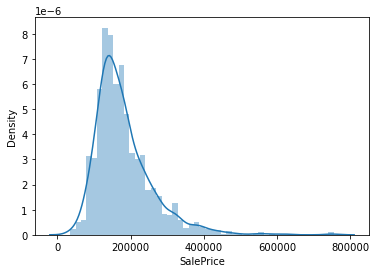

In [118]:
sns.distplot(df_train['SalePrice'])

### Relationship between the variable

In [119]:
c=pd.concat([df_train['SalePrice'],df_train['GrLivArea']],axis=1)

# Plotting scatter plot between these two. And it is evident that saleprice and GrLivArea has liner relationship between
them.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

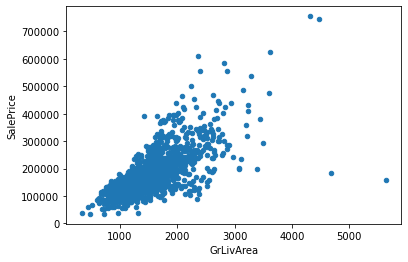

In [120]:
c.plot.scatter(x='GrLivArea',y='SalePrice')

###Now finding out the relation between SalePrice and TotalBsmtSF and while plotting the scatter plot it shows it has exponential relationship between these two variable.

In [121]:
c1=pd.concat([df_train['SalePrice'],df_train['TotalBsmtSF']],axis=1)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

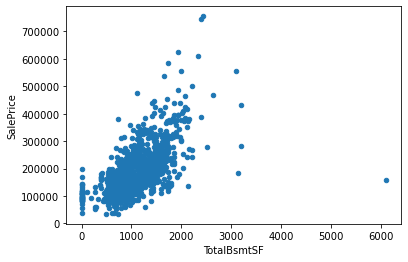

In [122]:
c1.plot.scatter(x='TotalBsmtSF',y='SalePrice')

In [123]:
#Now finding out the relationship between SalePrice and OverallQual and since it is categorical variable we will plot
#boxplot

In [124]:
c2=pd.concat([df_train['SalePrice'],df_train['OverallQual']],axis=1)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

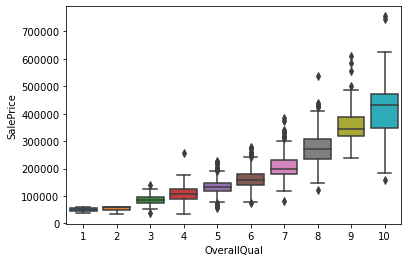

In [125]:
sns.boxplot(x='OverallQual',y='SalePrice',data=c2)

# It is clearly shown that when OverallQual goes up , salePrice also increases.

 

## Now handling with the missing values if any in the dataset

In [126]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


##After analysing we conclude that we could delete the columns that has missing data .More of that , this data are not relevent to a client when he buys a house , also it contains outliers .

In [127]:
df_train_fixed = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train_fixed = df_train_fixed.drop(df_train_fixed.loc[df_train['Electrical'].isnull()].index)
df_train_fixed.isnull().sum().max()

0

In [128]:
df_train.sort_values(by = 'GrLivArea', ascending = False)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,529,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,86000
29,30,30,RM,60.0,6324,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,68500
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
1100,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,60000


/Users/akshayshekhar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


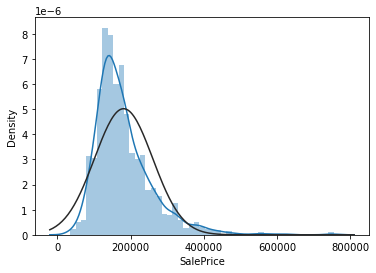

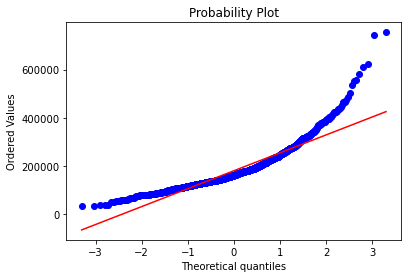

In [129]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plts.figure()
res = stats.probplot(df_train['SalePrice'], plot=plts)

#To normalized the sale price we apply a log transformation ,now We have a positive skewness , so that give us the previlage to use the log tronsformation .

/Users/akshayshekhar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


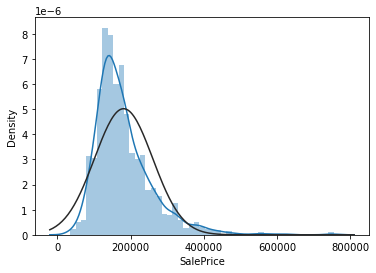

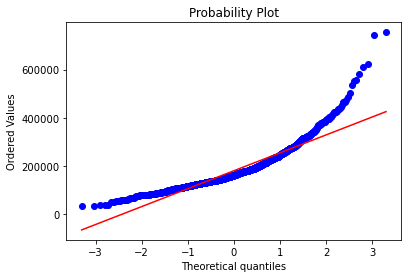

In [130]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plts.figure()
res = stats.probplot(df_train['SalePrice'], plot=plts)

In [131]:
#now checking the GrLivArea

/Users/akshayshekhar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


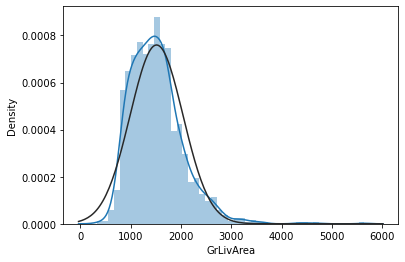

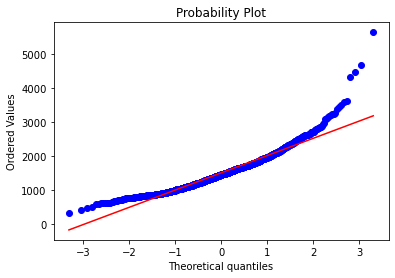

In [132]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plts.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plts)

/Users/akshayshekhar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


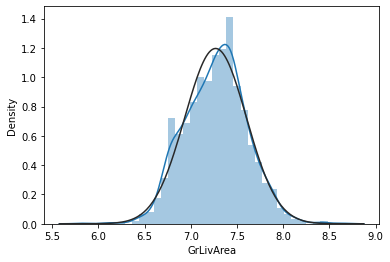

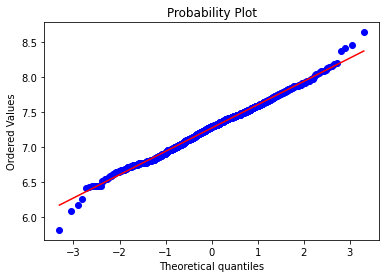

In [133]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plts.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plts  )  

/Users/akshayshekhar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


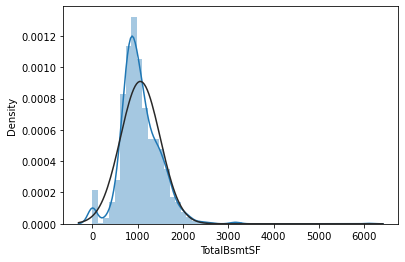

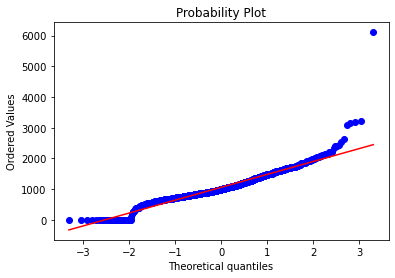

In [134]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plts.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plts)

/Users/akshayshekhar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/akshayshekhar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OverflowError: cannot convert float infinity to integer

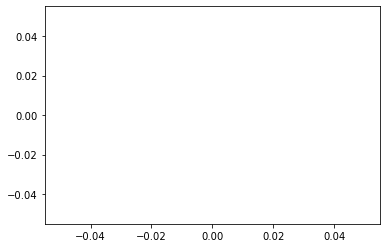

In [135]:
df_train['TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plts.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plts)

In [ ]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plts.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plts)

In [136]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [137]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

/Users/akshayshekhar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/Users/akshayshekhar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


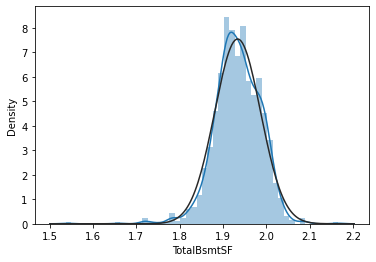

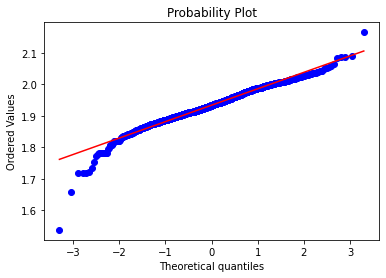

In [138]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plts.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plts)

#Now let us see the missing data in the test dataset

In [139]:
test_total = df_test.isnull().sum().sort_values(ascending=False)
test_percentage = (df_test.isnull().sum() / df_test.isnull().count()).sort_values(ascending=False)
test_missing_data = pd.concat([test_total, test_percentage], axis=1, keys=['Total', 'Percentage'])
test_missing_data.head(5)

,Total,Percentage
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343


In [140]:
imput=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
test_final= pd.DataFrame(imput.fit_transform(df_test), columns=df_test.columns)
test_final

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,Grvl,Reg,Lvl,AllPub,...,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,Grvl,IR1,HLS,AllPub,...,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21,1936,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2006,WD,Normal
1455,2916,160,RM,21,1894,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,4,2006,WD,Abnorml
1456,2917,20,RL,160,20000,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,9,2006,WD,Abnorml
1457,2918,85,RL,62,10441,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,700,7,2006,WD,Normal


In [141]:
train_final=df_train
train_final = train_final.drop('SalePrice', axis=1)
y = c

In [142]:
train_len = len(train_final)

df = pd.concat([train_final, test_final], ignore_index=True)

Encoder = preprocessing.LabelEncoder()
categorical = df.select_dtypes(include=['object'])

for column in categorical:
    df[column] = Encoder.fit_transform(df[column].astype('str'))

train_final = df[:train_len]
test_final = df[train_len:]

print("DF Shape:", df.shape)
print("Train Shape:", train_final.shape)
print("Test Shape:", test_final.shape)

DF Shape: (2919, 81)
Train Shape: (1460, 81)
Test Shape: (1459, 81)


In [143]:
train_final=train_final.drop(['HasBsmt'],axis=1)
test_final=test_final.drop(['HasBsmt'],axis=1)

In [144]:
predict_data=train_final[['TotalBsmtSF','OverallQual','YearBuilt','GrLivArea']]
test_predection=test_final[['TotalBsmtSF','OverallQual','YearBuilt','GrLivArea']]

GBR = GradientBoostingRegressor(loss='huber', n_estimators=2000, learning_rate=.05)

cv_score = cross_val_score(GBR, train_final, y, cv=10, n_jobs=-1)

GBR.fit(train_final, y)


ValueError: y should be a 1d array, got an array of shape (1460, 2) instead.

In [148]:
y_pred = GBR.predict(test_final)
submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
print("y_pred shape:", y_pred.shape)

print("submission shape:", submission.shape)
y_pred

AttributeError: 'GradientBoostingRegressor' object has no attribute 'estimators_'

In [149]:
submission['SalePrice'] = y_pred

NameError: name 'y_pred' is not defined

In [146]:
submission.to_csv('submission_final.csv', index=False)

NameError: name 'submission' is not defined

In [150]:
np.log(100)

4.605170185988092

In [151]:
np.log(1000)

6.907755278982137

In [152]:
np.log(10000)

9.210340371976184

In [153]:
np.log(100000)

11.512925464970229